In [1]:
from lsh import transform, lsh
import pickle as p
import pandas as pd

In [17]:
all_questions = transform.get_unique_question_list('../data/train.csv').reset_index()

In [18]:
all_questions.to_pickle('all_questions')

In [5]:
cv = transform.get_cv(all_questions)
with open('pickledcv', 'wb') as f:
    p.dump(cv, f)

In [8]:
vectorizer = p.load(open("pickledcv", "rb"))
shingles = vectorizer.transform(all_questions['question'])
shingles

<537835x703577 sparse matrix of type '<class 'numpy.int64'>'
	with 30451386 stored elements in Compressed Sparse Row format>

In [9]:
questions = pd.read_pickle("all_questions")

In [20]:
questions = pd.read_pickle("all_questions").loc[[1]]['question'].values
questions

array(['What is the story of Kohinoor (Koh-i-Noor) Diamond?'],
      dtype=object)

In [12]:
#assumes that data is a num_observations by num_features numpy matrix
lsh_model = lsh.LSH(shingles)
num_of_random_vectors = 15
lsh_model.train(num_of_random_vectors)

with open('pickledlsh', 'wb') as f:
    p.dump(lsh_model, f)
#find the 5 nearest neighbors of data[1] while searching in 10 buckets 


In [13]:
with open('pickledlsh', 'rb') as f:
    xx = p.load(f).query(shingles[502,:], 5, 10)

In [14]:
xx['id'].to_list()

[109359, 129285, 367147, 291496, 47198]

In [15]:
print(all_questions.loc[[349137]]['question'].values)

['How do you expect to react if Donald Trump wins the U.S. Presidential Election?']


In [15]:
dic = {'question': ['How do you expect to react if Donald Trump wins the U.S. Presidential Election?']}
df2 = pd.DataFrame(dic)
vectorizer.transform(df2['question'])

<1x703577 sparse matrix of type '<class 'numpy.int64'>'
	with 75 stored elements in Compressed Sparse Row format>

In [21]:
df2['question']

0    How do you expect to react if Donald Trump win...
Name: question, dtype: object

In [40]:
shingles[502,:]

<1x703577 sparse matrix of type '<class 'numpy.int64'>'
	with 51 stored elements in Compressed Sparse Row format>

In [41]:
df2_s = transform.make_singles(df2)
df2_s

<1x75 sparse matrix of type '<class 'numpy.int64'>'
	with 75 stored elements in Compressed Sparse Row format>

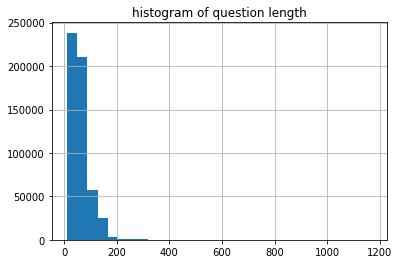

In [13]:
import matplotlib.pyplot as plt
all_questions['question'].apply(len).hist(bins=30)
ax = plt.gca()
ax.set_title('histogram of question length');

In [14]:
vectorizer = CountVectorizer(
    analyzer='char', 
    ngram_range=(4, 4), 
    strip_accents=None
)

NameError: name 'CountVectorizer' is not defined

In [15]:
shingles = vectorizer.fit_transform(all_questions['question'])

shingles

NameError: name 'vectorizer' is not defined

In [16]:
shingles.shape

NameError: name 'shingles' is not defined

In [17]:
_, doc_shingles = shingles.getrow(0).nonzero()
feature_names = vectorizer.get_feature_names()
print(doc_shingles)
print([feature_names[shi] for shi in doc_shingles])

NameError: name 'shingles' is not defined

In [18]:
all_questions['question'][0]

0    What is the step by step guide to invest in sh...
0    What is the step by step guide to invest in sh...
Name: question, dtype: object

In [19]:
doc1 = [1, 3, 4]

hash_fs = [
    lambda x: (x + 1) % 3,
    lambda x: ((3 * x) + 1) % 3,
    lambda x: ((6 * x) + 3) % 3
]

hashed_doc = []
for hash_f in hash_fs:
    print([hash_f(x) for x in doc1])
    hashed_doc.append(min(hash_f(x) for x in doc1))
hashed_doc

[2, 1, 2]
[1, 1, 1]
[0, 0, 0]


[1, 1, 0]

# minhash

In [20]:
import sympy
from tqdm import trange, tqdm
import numpy as np

def minhash(shingle_mat, sig_size):
    a, b = np.random.randint(0, shingle_mat.shape[1], size=(2, sig_size))
    c = sympy.nextprime(shingle_mat.shape[1])

    out = np.empty((shingle_mat.shape[0], sig_size), dtype=np.int)
    for row_id in trange(shingle_mat.shape[0]):
        _, row_shingles = shingle_mat.getrow(row_id).nonzero()
        row_minhash = row_shingles[np.argmin(np.mod(row_shingles[:, np.newaxis] * a + b, c), axis=0)]
        out[row_id, :] = row_minhash
        
    return out

ModuleNotFoundError: No module named 'sympy'

In [21]:
minhashes = minhash(shingles, 100*10)

NameError: name 'minhash' is not defined

In [22]:
minhashes

NameError: name 'minhashes' is not defined

In [23]:
np.random.seed(42)
np.set_printoptions(linewidth=110)
minhash_sample = np.round(np.random.randint(0, 5, (400, 25)), 2)
minhash_sample

NameError: name 'np' is not defined

# Putting it all together 

In [24]:
startup:
    - data --> shingles (vectorizer) --> shingels_mat
    - init minhasher

SyntaxError: invalid syntax (<ipython-input-24-f95da6834d5a>, line 1)

In [25]:
import sympy
import numpy as np
from tqdm import trange, tqdm
from functools import lru_cache
import functools
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

ModuleNotFoundError: No module named 'sympy'

In [26]:
vectorizer = CountVectorizer(
    analyzer='word', 
    ngram_range=(2,2), 
    strip_accents=None
)

NameError: name 'CountVectorizer' is not defined

In [27]:
shingles = vectorizer.fit_transform(all_questions['question'])

NameError: name 'vectorizer' is not defined

In [28]:
_, doc_shingles = shingles.getrow(0).nonzero()
feature_names = vectorizer.get_feature_names()
print(doc_shingles)
print([feature_names[shi] for shi in doc_shingles])

NameError: name 'shingles' is not defined

In [29]:
class MinHasher:
    def __init__(self, shingle_mat, sig_size, seed, band_cols):
        self.shingle_mat = shingle_mat
        self.sig_size = sig_size
        self.band_cols = band_cols
        np.random.seed(seed)
        self.a, self.b = np.random.randint(0, self.shingle_mat.shape[1], size=(2, self.sig_size))
        self.c = sympy.nextprime(self.shingle_mat.shape[1])
        
        # Todo does not work yet
        self.band_1 = self._hash_array_rows(shingle_mat[:, 0:self.band_cols])
        
    def minhash(self, shingle_mat):
        minhashes = np.empty((shingle_mat.shape[0], self.sig_size), dtype=np.int)
        for row_id in trange(shingle_mat.shape[0]):
            _, row_shingles = shingle_mat.getrow(row_id).nonzero()
            row_minhash = row_shingles[np.argmin(np.mod(row_shingles[:, np.newaxis] * self.a + self.b, self.c), axis=0)]
            minhashes[row_id, :] = row_minhash
        return minhashes
    
    def jaccard(self, q1, q2):
        q1h = self.minhash(q1)
        q2h = self.minhash(q2)
        return np.sum(q1h == q2h) / self.sig_size
    
    def _hash_array_rows(self, array):
        return np.apply_along_axis(
            lambda row: functools.reduce(lambda prev_hash, value: prev_hash * 31 + value, row, 1), 
            axis=1, 
            arr=array
        )
    
    def banding_search(self, q):
        # minhash provided question
        qh = self.minhash(q)
        band_1_q = self._hash_array_rows(qh[:, 0:self.band_cols])
#         band_1 = self.shingle_mat[:, 0:c]
#         # perform hash function to rows 
        candidates = all_questions[self.band_1 == band_1_q[0]]
        print(candidates)
#         top5_candidates= []
#         return top5_candidates

In [30]:
shingles[:, 0:5]

NameError: name 'shingles' is not defined

In [31]:
minhasher = MinHasher(shingles, 1000, seed=42, band_cols=20)

NameError: name 'shingles' is not defined

In [32]:
input = all_questions.loc[lambda d: d.qid.isin([23, 24])]
input

qid                                     question
11   23  How do I read and find my YouTube comments?
11   24       How can I see all my Youtube comments?

In [33]:
two_shingles = vectorizer.transform(input['question'])

NameError: name 'vectorizer' is not defined

In [34]:
minhasher.jaccard(two_shingles[0], two_shingles[1])

NameError: name 'minhasher' is not defined

In [35]:
minhasher.banding_search(two_shingles[0])

NameError: name 'minhasher' is not defined